# Toppers

In [1]:
%matplotlib notebook

import datetime
from pathlib import Path
import sqlite3

import pandas as pd

db_filename = f'{Path.home()}/var/trader/db/trader.db'
connection = sqlite3.connect(db_filename)

In [2]:
start_date = '2020-01-01'
reference_date = '2021-07-01'
yesterday_date = datetime.date.today() - datetime.timedelta(days=1)

print(f'Yesterday: {yesterday_date}')

Yesterday: 2021-09-25


In [3]:
query = f'''
  SELECT d.timestamp,
         m.base,
         s.close,
         d.close,
         round(100 * d.close / s.close, 1) AS idx,
         round(d.close * d.volume / 100000, 1) AS total
    FROM market_daily_prices AS d
    JOIN markets AS m
          ON m.id = d.market_id
    JOIN market_daily_prices AS s
          ON d.market_id = s.market_id
         AND s.timestamp = strftime('%s', '{reference_date}')
   WHERE d.timestamp = strftime('%s', '{yesterday_date}')
     AND total >= 50
ORDER BY idx DESC, total DESC
'''

df = pd.read_sql(query, connection, parse_dates={'timestamp': 's', 'created_on': 's', 'updated_on': 's'})
df

,timestamp,base,close,close,idx,total
0,2021-09-25,ADA,1.12690,1.96780,174.6,338.7
1,2021-09-25,XRP,0.55689,0.80382,144.3,63.8
2,2021-09-25,ETH,1784.70000,2506.20000,140.4,118.2
3,2021-09-25,BTC,28300.00000,36479.00000,128.9,100.1


<IPython.core.display.Javascript object>


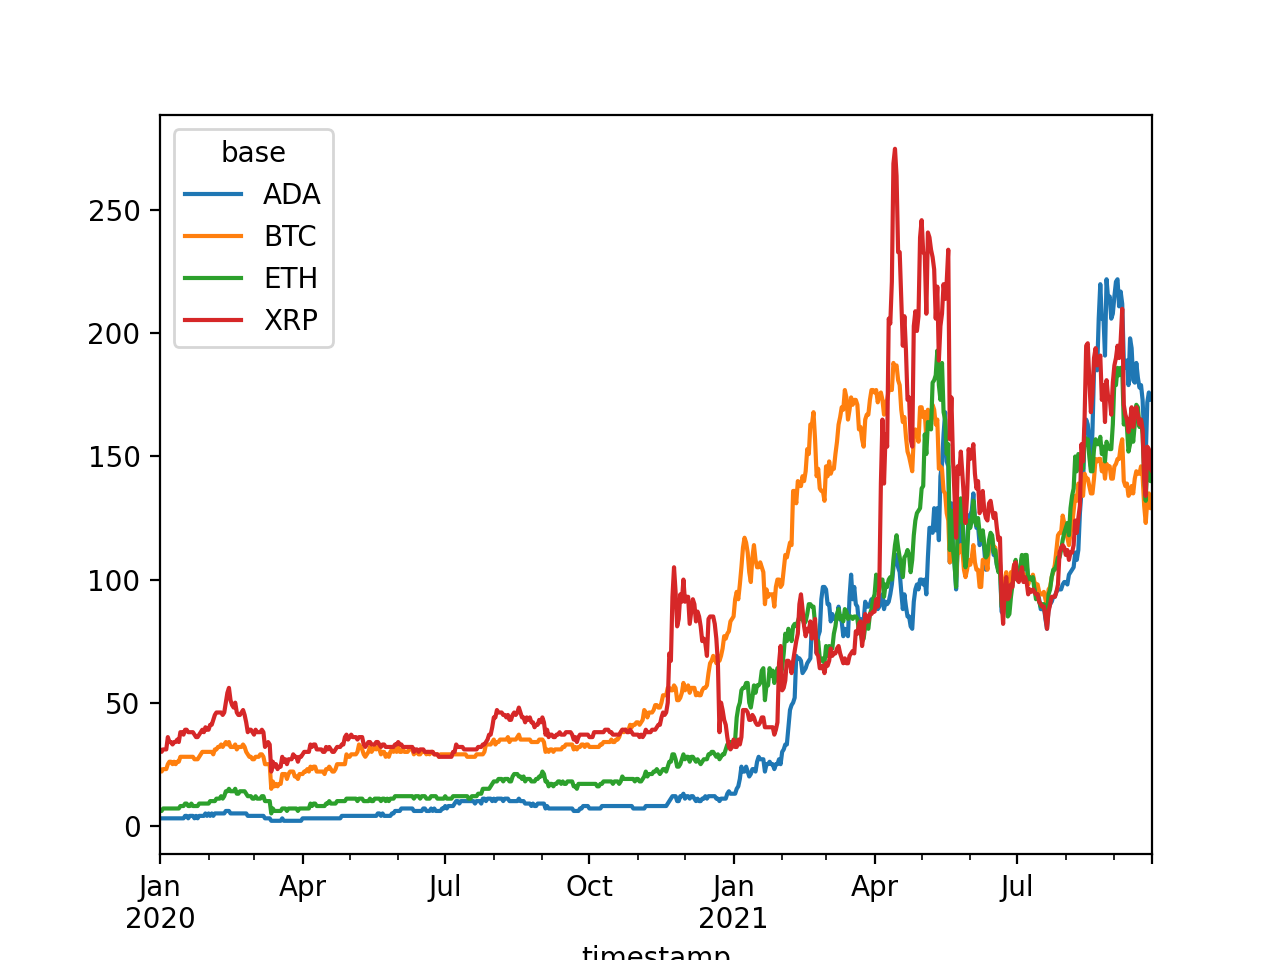

<AxesSubplot:xlabel='timestamp'>

In [5]:
query = f'''
SELECT d.timestamp,
       m.base,
       round(100 * d.close / s.close) AS idx
  FROM market_daily_prices AS d
  JOIN markets AS m
        ON m.id = d.market_id
  JOIN market_daily_prices AS s
        ON d.market_id = s.market_id
       AND s.timestamp = strftime('%s', '{reference_date}')
 WHERE m.base IN ('ADA', 'XRP', 'ETH', 'BTC')
   AND d.timestamp >= strftime('%s', '{start_date}')
'''

df = pd.read_sql(query, connection, index_col='timestamp', parse_dates={'timestamp': 's', 'created_on': 's', 'updated_on': 's'})
top = df.pivot(columns='base', values='idx')
top.plot()